<a href="https://colab.research.google.com/github/ilEnzio/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/ERLE_GRANGERII_DS18_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [100]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [101]:
# load in dataset
boot_campers_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv")
boot_campers_df

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,86961,No,"Not employed, and not looking for work","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",9-11 years,9-11 years,180000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;Python;Ruby;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Middle Eastern
2757,87004,"Yes, full-time","Not employed, and not looking for work","Another engineering discipline (ex. civil, ele...",Full-stack developer;Student,3-5 years,0-2 years,36716.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;PHP;SQL;TypeScript;Delphi/Object...,Male,25 - 34 years old,White or of European descent
2758,87054,"Yes, part-time","Not employed, but looking for work","Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,0-2 years,3-5 years,2904.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent


In [102]:
boot_campers_df.shape

(2761, 15)

In [103]:
boot_campers_df.isnull().sum()

Unnamed: 0            0
Student               0
Employment            0
UndergradMajor        0
DevType               0
YearsCoding           0
YearsCodingProf       0
ConvertedSalary       0
EducationTypes        0
SelfTaughtTypes       0
TimeAfterBootcamp     0
LanguageWorkedWith    0
Gender                0
Age                   0
RaceEthnicity         0
dtype: int64

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [78]:
# use .sample method to grab a random sample from the df, use a seed of 42
boot_c_20sample = boot_campers_df.sample(20, random_state=42)
boot_c_200sample = boot_campers_df.sample(200, random_state=42)

In [79]:
boot_c_20sample.shape


(20, 15)

In [80]:
boot_c_200sample.shape

(200, 15)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [81]:
boot_c_20sample["ConvertedSalary"].value_counts()

60000.0     2
25047.0     1
86120.0     1
10704.0     1
6348.0      1
9600.0      1
128544.0    1
9706.0      1
42635.0     1
14687.0     1
40196.0     1
135000.0    1
62507.0     1
62600.0     1
41124.0     1
64417.0     1
31309.0     1
150000.0    1
74500.0     1
Name: ConvertedSalary, dtype: int64

In [82]:
# get sample means aka Point Estimate
s20_mean =boot_c_20sample["ConvertedSalary"].mean()
s200_mean = boot_c_200sample["ConvertedSalary"].mean()

In [83]:
print(s20_mean)
print(s200_mean)

55752.2
68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the s200_mean, the one with the sample size of 200.  I know that this sample mean is more precise because of the larger size.  Larger sample size indicates a smaller smaller standard error, and smaller margin of error.  
But to convey this to a non-technical audience it would be good to illustration(plot) the Confidence Interval. (the range which actual mean could be.)

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

No. The point estimate alone doesn't indicate anything in particular.  

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We could indicate the size of each sample.  
It would be good to illustrate(plot) the Confidence Interval. (the range which actual mean could be.)
The confidence level implies things like Margin of Error and Standard Deviation, but we could indicate those as well.


## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [104]:
from scipy import stats

In [26]:
print(np.array(s200_mean))

68551.255


In [105]:
from collections import namedtuple

In [128]:
# I already have point estimates for the samples
# so now I need to create a function which takes
# a sample and a confidence level


def get_confidence_interval(sample, confidence_level):

  # in because we like some np functions 
  # make a np array for our sample
  sample_np_array = np.array(sample)

  # variables we need for the calculations are 
  # std_dev, sample size, t-statistic

  std_dev = np.std(sample_np_array, ddof=1)
  sample_size = sample_np_array.shape[0]

  #here's the new one: from scipy stats 
  # Percent Point Function (Inverse of CDF)
  # this value take ?? percent of data that  as a parameter
  # does same thing as university of I. applet
  tstat = stats.t.ppf(1 - ((1 - confidence_level) / 2), sample_size-1)

  # need the sample mean as x_bar
  x_bar = np.mean(sample_np_array)

  # I need the standard error =
  # standard deviation / squareroot of sample size
  std_err = (std_dev/np.sqrt(sample_size))

  # now I need the Margin of Error
  # which is tstat * standard error
  moe = tstat*std_err

  # then for info purposes lets return the 
  # lower and upper bounds

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  confidence_int = namedtuple("confidence_interval", ["lower_bound", "xbar","upper_bound","moe", ])

  # return (lower_bound, x_bar, upper_bound, moe)
  return confidence_int(lower_bound, x_bar, upper_bound, moe)
  

In [129]:
boot_20sample_values = get_confidence_interval(boot_c_20sample["ConvertedSalary"], .95)
boot_200sample_values = get_confidence_interval(boot_c_200sample["ConvertedSalary"], .95)

In [130]:
print(boot_20sample_values)
print()
print(boot_200sample_values)

confidence_interval(lower_bound=35805.10309625536, xbar=55752.2, upper_bound=75699.29690374463, moe=19947.096903744638)

confidence_interval(lower_bound=60593.058804479086, xbar=68551.255, upper_bound=76509.45119552092, moe=7958.196195520917)


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [131]:
# since I created a named tuple I can just call the moe directly
print(boot_20sample_values.moe)
print(boot_200sample_values.moe)
#  A margin of error tells you how far off your results will differ from the real population value.

19947.096903744638
7958.196195520917


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

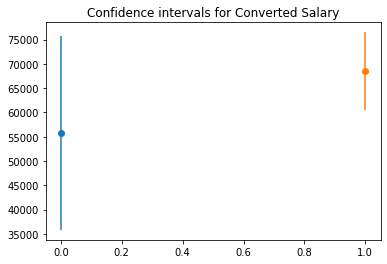

In [132]:
# these are similar to box plot
# first parameter is the x position to distinguish it from the next graph
# next parameter is the sample mean or Point Estimate
# next is the Margin of error
# last parameter I can't remember 
plt.errorbar(0, boot_20sample_values.xbar, boot_20sample_values.moe, fmt="o")
plt.errorbar(1, boot_200sample_values.xbar, boot_200sample_values.moe, fmt="o")

plt.title('Confidence intervals for Converted Salary')

plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

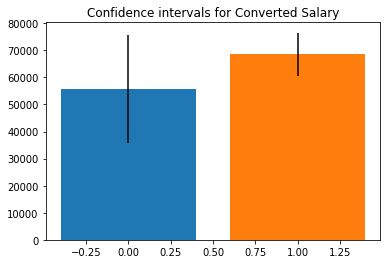

In [91]:
plt.bar(0, height=boot_20sample_values.xbar, yerr=boot_20sample_values.moe)
plt.bar(1, height=boot_200sample_values.xbar, yerr=boot_200sample_values.moe)

plt.title('Confidence intervals for Converted Salary')

plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [133]:
# boot_campers_df
# get_confidence_interval(sample, confidence_level)
# ["ConvertedSalary"]

entire_df = get_confidence_interval(boot_campers_df["ConvertedSalary"], .95)
print(entire_df)
# print(boot_campers_df["ConvertedSalary"].shape)
# I think the estimates are 3 times more precise than with the larger sample size.


confidence_interval(lower_bound=71299.82986224785, xbar=73453.40420137631, upper_bound=75606.97854050477, moe=2153.574339128457)


**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision represents how tight or small our confidence interval is around the central tendency.  

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**



 95% of the confidence intervals calculated from these random samples will contain the true population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [94]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-07-16 01:39:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-07-16 01:39:07 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [95]:
# uci no headers; make list to read in with headers 
hv_headers = ["Class_Name", "handicapped-infants","water-project-cost-sharing", 
              "adoption-of-the-budget-resolution","physician-fee-freeze", 
              "el-salvador-aid", "religious-groups-in-schools", "anti-satellite-test-ban",
              "aid-to-nicaraguan-contras","mx-missile", "immigration", " synfuels-corporation-cutback",
              "education-spending", "superfund-right-to-sue", "crime", "duty-free-exports",
              "export-administration-act-south-africa"]

In [96]:
house_votes_df = pd.read_csv("house-votes-84.data", names=hv_headers, na_values="?")

house_votes_df.tail()


,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,NaN,n


In [97]:
# replace y with 1, and no with 0; 
#  .replace
cat_house_vote_df = house_votes_df.replace({"y": 1, "n":0})
cat_house_vote_df.tail()

,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0
434,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0


In [98]:
# looks good so far.  Now split the Dems and Reps into their own df's
# each one of these is technically a sample, but it's not a random sample

cond_dem = cat_house_vote_df["Class_Name"] == "democrat"
cond_rep = cat_house_vote_df["Class_Name"] == "republican"
# create with filters 

dem_vote_df = cat_house_vote_df[cond_dem]
rep_vote_df = cat_house_vote_df[cond_rep]



In [110]:
#drop the nans
dem_vote_noNans = dem_vote_df.dropna()
rep_vote_noNans = rep_vote_df.dropna()

In [112]:
# so we're going to find the sample mean for the dem's religion groups in schools vote. 
# 
dem_religous_group_vote_samp_mean = get_confidence_interval(dem_vote_noNans["religious-groups-in-schools"], .95)

In [ ]:
# 1) Study the relationship between t-tests and confidence intervals.
# Find a sample mean that we have worked with and construct a 95% confidence 
# interval around it. (find the lower and upper bounds)

In [114]:
# the upper and lower bounds
print(f"Upper bound: {dem_religous_group_vote_samp_mean.upper_bound}")
print(f"Lower bound: {dem_religous_group_vote_samp_mean.lower_bound}")

Upper bound: 0.5322177734438303
Lower bound: 0.3548790007497182


In [120]:
# Run a 1-sample t-test with the null hypothesis value being just barely 
# outside of the confidence interval. What is the p-value?

# for a one sample t-test I need the population mean or concept 
# which in this case they are saying should be just outside the confidence 
# interval.  like 6 or 5.5 if they are picky...

stats.ttest_1samp(dem_vote_noNans["religious-groups-in-schools"], .6)

Ttest_1sampResult(statistic=-3.4925963478495268, pvalue=0.0006652926090971633)

In [ ]:
# the pvalue was .00066, so I would reject just about any null hypothesis
# test.  I"ll try a closer one.  

In [122]:
stats.ttest_1samp(dem_vote_noNans["religious-groups-in-schools"], .55)

Ttest_1sampResult(statistic=-2.3764057624543184, pvalue=0.019025361480088508)

In [ ]:
# wow it's still very unlikely!!! I love it :)

In [123]:
# Run a 1-sample t-test with the null hypothesis value being just barely inside
# of the confidence interval. What is the p-value?

stats.ttest_1samp(dem_vote_noNans["religious-groups-in-schools"], .36)

Ttest_1sampResult(statistic=1.8651184620474794, pvalue=0.0645477356784386)

In [ ]:
## LOL Wow, this is amazing!  

In [ ]:

# What does it mean when we say that the boundaries of the confidence interval 
# are the boundaries of statistical significance in a 1-sample t-test?

# It literally means that any sample means that fall outside the confidence 
# intervals will cause us to reject the null hypothesis; those values will be 
# statistically significant (therefore unlikely if our H0 is true!).

In [171]:
#2) Go back to our congressional voting dataset and build confidence intervals 
# around the means of all of the issues for a single party. 

# function batch dem vote confidence interval

# iterate over the columns
def batch_dem_vote_confidence_interval(df):
  for i in range(1, len(df.columns)):
    bill_name = df.columns[i]
    print(f"Bill: {bill_name.title()}")
    print(get_confidence_interval(df.iloc[:,i], .95))
    print()

    
    

In [212]:
# test the comprehension
df = dem_vote_noNans
# getconfindence interval(each column, .95) for (each column) in (the dataframe)
# 
#get_confidence_interval(df[x], .95)

vote_con_int = [get_confidence_interval(df[x], .95) for x in df.iloc[:,1:]]


In [224]:
# this is the comprehension version, but I need to refactor to make it show
# bill names
[get_confidence_interval(df[x], .95) for x in df.iloc[:,1:]]

[confidence_interval(lower_bound=0.5008854514528094, xbar=0.5887096774193549, upper_bound=0.6765339033859004, moe=0.08782422596654543),
 confidence_interval(lower_bound=0.3627917755681809, xbar=0.45161290322580644, upper_bound=0.540434030883432, moe=0.08882112765762555),
 confidence_interval(lower_bound=0.791966749899413, xbar=0.8548387096774194, upper_bound=0.9177106694554258, moe=0.06287195977800639),
 confidence_interval(lower_bound=0.01008836071171925, xbar=0.04838709677419355, upper_bound=0.08668583283666784, moe=0.038298736062474296),
 confidence_interval(lower_bound=0.13000591391201893, xbar=0.20161290322580644, upper_bound=0.27321989253959394, moe=0.07160698931378752),
 confidence_interval(lower_bound=0.3548790007497182, xbar=0.4435483870967742, upper_bound=0.5322177734438303, moe=0.08866938634705603),
 confidence_interval(lower_bound=0.6905800506734978, xbar=0.7661290322580645, upper_bound=0.8416780138426312, moe=0.07554898158456666),
 confidence_interval(lower_bound=0.7637035

In [172]:
# this is the loop version
batch_dem_vote_confidence_interval(dem_vote_noNans)

Bill: Handicapped-Infants
confidence_interval(lower_bound=0.5008854514528094, xbar=0.5887096774193549, upper_bound=0.6765339033859004, moe=0.08782422596654543)

Bill: Water-Project-Cost-Sharing
confidence_interval(lower_bound=0.3627917755681809, xbar=0.45161290322580644, upper_bound=0.540434030883432, moe=0.08882112765762555)

Bill: Adoption-Of-The-Budget-Resolution
confidence_interval(lower_bound=0.791966749899413, xbar=0.8548387096774194, upper_bound=0.9177106694554258, moe=0.06287195977800639)

Bill: Physician-Fee-Freeze
confidence_interval(lower_bound=0.01008836071171925, xbar=0.04838709677419355, upper_bound=0.08668583283666784, moe=0.038298736062474296)

Bill: El-Salvador-Aid
confidence_interval(lower_bound=0.13000591391201893, xbar=0.20161290322580644, upper_bound=0.27321989253959394, moe=0.07160698931378752)

Bill: Religious-Groups-In-Schools
confidence_interval(lower_bound=0.3548790007497182, xbar=0.4435483870967742, upper_bound=0.5322177734438303, moe=0.08866938634705603)

Bi

In [ ]:
#Compare all of those confidence intervals graphically on a single graph.

#def get_confidence_interval(sample, confidence_level):